#### I will use a couple of differnt models to predict the excepted salary of differnt positions that we scrapped from glassdoor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Read the data after data cleaning and Explority data anlayst 

In [2]:
data= pd.read_csv('data_after_cleaning.csv')

#### Let's how many rows and columns we have

In [3]:
data.shape

(863, 43)

#### Next when we're building one of these models and we have categorical data we need to make what is known as dummy variable for each column like type of categorical variable so let's say we have our job simplified for data scientist data engineer machine learning engineer each of those need their own specific column we make a column for each of these and there's a one in the column if they have that attribute so if you're a data scientist the data scientist would have a one in it , and so that you know greatly increases the number of columns in our data frame

In [4]:
data.columns

Index(['JobId', 'Source', 'CollectedDate', 'JobTitle', 'CompanyName',
       'RatingNumber', 'PostedDate', 'Posted_Date_N', 'Salary', 'jobURL',
       'fullJobDescribtion', 'Size', 'Type_Of_Ownership', 'Sector', 'Founded',
       'Industry', 'Revenue', 'hourly', 'avg_salary', 'company_text',
       'job_state', 'job_city', 'age_company', 'job_simp', 'seniority',
       'desc_len', 'Machine_Learning', 'Python', 'Spark', 'Hadoop', 'Plarform',
       'ETL', 'Sql', 'Security', 'PHD', 'Excel', 'Aws', 'PyTorch',
       'TensorFlow', 'Tableau', 'Keras', 'Deep_Learning', 'Machine_Deep'],
      dtype='object')

#### Shuffle the rows of the DataFrame using the sample() with the parameter frac as 1 , it determines what fraction of total instances need to be returned

In [5]:
data =data.sample(frac=1)
data.head()

,JobId,Source,CollectedDate,JobTitle,CompanyName,RatingNumber,PostedDate,Posted_Date_N,Salary,jobURL,...,Security,PHD,Excel,Aws,PyTorch,TensorFlow,Tableau,Keras,Deep_Learning,Machine_Deep
478,1008017048061,Glassdoor,2022-11-11,Lead Research Data Analyst,UC San Diego\n4.2,4.2,30d+,2022-10-12,$60K - $83K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,...,0,1,1,0,0,0,0,0,1,1
417,1008272427168,Glassdoor,2022-11-10,"Data Entry Specialist, Hours of Service (REMOT...",DISA Global Solutions\n3.1,3.1,24h,2022-10-17,$32K - $47K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,...,0,0,1,0,0,0,0,0,1,0
535,1008129090348,Glassdoor,2022-11-11,Data Analyst,Sojern\n4.4,4.4,30d+,2022-10-12,$68K - $101K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,...,0,0,1,0,0,1,1,0,1,1
299,1008264832897,Glassdoor,2022-11-09,Data Analytics Engineer,Acknowledge\n4.3,4.3,1d,2022-11-08,$100K - $110K (Employer est.),https://www.glassdoor.com/partner/jobListing.h...,...,1,0,0,0,0,1,1,0,0,0
573,1008264998717,Glassdoor,2022-11-11,Data Analyst Apprenticeship,Verizon\n3.9,3.9,3d,2022-11-08,$61K - $91K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,...,1,0,0,0,0,0,1,0,0,0


#### Next when we're building one of these models and we have categorical data we need to make what is known as dummy variable for each column like type of categorical variable so let's say we have our job simplified for data scientist data engineer machine learning engineer each of those need their own specific column we make a column for each of these and there's a one in the column if they have that attribute so if you're a data scientist the data scientist would have a one in it , and so that you know greatly increases the number of columns in our data frame

In [6]:
df_model=data[['avg_salary','RatingNumber','Size','Type_Of_Ownership','Industry','Sector','Revenue','job_state','Python','Spark','Aws','Excel','Machine_Learning','Tableau','Keras','TensorFlow','job_simp','job_state','seniority','desc_len','Deep_Learning','PyTorch','Machine_Deep','job_city','PHD','Sql','Security','Hadoop','hourly']]

#### Let's get our dummy data  so a lot of people use like one hot encoder I think get dummies works mose effectively

In [7]:
df_model=pd.get_dummies(df_model)

#### as we can see we went from 34 to 353 columns 

In [8]:
df_model.shape

(863, 354)

#### The first model we want to make is a Lenear Regreesion ,and the second one we want to do is a Lassso Regression and we're going to use a Lasso Regression because this data set is going to be so sparse with all these dummy variables ,the third thing we're going to do is a random forest after that we want to basically tune between these models using grid search   

#### when we do values that makes it creates an array instead of series 

In [9]:
x=df_model.drop('avg_salary',axis=1)
y=df_model['avg_salary'].values

#### let's display the head of x using head() functuon

#### We're going to create train test splits and we create a team we create a trained test split because we want our models to generalize wll so usually use a train set , a validation set and a test set and then to make sure that your models are actually effective in the real word you use that test set so I generally use the test set to test ensamble models , This here is going to give us a train set and a test set and we're going to split it by 0.2 that means there's 80 percent in our train set and 20 percent in our test se

In [56]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=22)

In [57]:
xtest.shape

(173, 353)

#### The first model we want to make is a multiple linear regression ,we're going to use mean absolute error because I think it's most representative, this will show how far on average we're off our general prediction ,So it's a little bit difficult to actually get good values there is such limited data 

In [58]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
lr.fit(xtrain,ytrain)
print(cross_val_score(lr,xtrain,ytrain, scoring = 'neg_mean_absolute_error', cv=3))
print(np.mean(cross_val_score(lr,xtrain,ytrain, scoring = 'neg_mean_absolute_error', cv= 3)))

[-61.42133385 -20.38524221 -11.92525044]
-31.243942166040938


#### we're going to use a lasso regression ,because this data set is so sparse with all these dummies and normalizes those values it should be better for model .
Note : Where alpha is equal Zero it's the exact same thing as OLS multiple learning english 

In [59]:
ls=Lasso()
ls.fit(xtrain,ytrain)
cross_val_score(ls,xtrain,ytrain, scoring='neg_mean_absolute_error',cv=3)
np.mean(cross_val_score(ls,xtrain,ytrain,scoring='neg_mean_absolute_error',cv=3))

-15.702949484597392

In [60]:
alpha=[]
error=[]
for i in range(1,100):
    alpha.append(i/100)
    lm_l=Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lm_l,xtrain,ytrain,scoring='neg_mean_absolute_error',cv=3)))

C:\Users\Mohameed\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.415e+03, tolerance: 7.226e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Mohameed\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.263e+03, tolerance: 6.338e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


#### as we increase alpha it increases the amount of data is smoth let's try a different values of alpha and to see which one performs the best

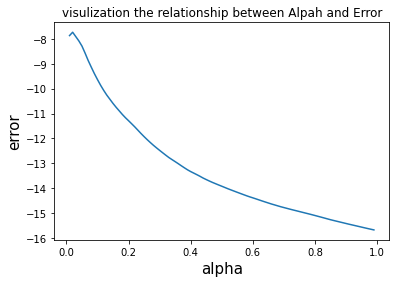

In [61]:
plt.figure(figsize=(6,4))
plt.plot(alpha,error)
plt.xlabel('alpha',fontsize=15)
plt.ylabel('error',fontsize=15)
plt.title('visulization the relationship between Alpah and Error')
plt.show()

#### Nice , so we can see below that alpha of 0.02 is giving us the best error

In [62]:
err = tuple(zip(alpha,error))
err=pd.DataFrame(err,columns=['alpha','error'])
err[err['error'] == max(err['error'])]

,alpha,error
1,0.02,-7.733765


In [63]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)
np.mean(cross_val_score(rf,xtrain,ytrain,scoring='neg_mean_absolute_error',cv=3))

-4.927022940328711

#### Next thing we would want to do a little improvment for RandomForestRegressor through tuning GridSearch .
What grid search does ?

you put in all the parameters that you want to test it and actually it runs all the models t spits out the one with the best result 

In [64]:
from sklearn.model_selection import GridSearchCV
parameters ={'n_estimators':range(10,100,10),'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}
gs =GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(xtrain,ytrain)

C:\Users\Mohameed\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Mohameed\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Mohameed\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Mohameed\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Mohameed\Anaconda3\lib\site-package

C:\Users\Mohameed\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Mohameed\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Mohameed\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Mohameed\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Mohameed\Anaconda3\lib\site-package

C:\Users\Mohameed\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Mohameed\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Mohameed\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Mohameed\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\Mohameed\Anaconda3\lib\site-package

C:\Users\Mohameed\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
C:\Users\Mohameed\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
C:\Users\Mohameed\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
C:\Users\Mohameed\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
C:\Users\Mohameed\Anaconda3\lib\site-pac

C:\Users\Mohameed\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
C:\Users\Mohameed\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
C:\Users\Mohameed\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
C:\Users\Mohameed\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
C:\Users\Mohameed\Anaconda3\lib\site-pac

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 100, 10)},
             scoring='neg_mean_absolute_error')

In [65]:
print('The best score is = {}'.format(gs.best_score_))
print('The best estimator is = {}\n'.format(gs.best_estimator_))

The best score is = -4.805135869565217
The best estimator is = RandomForestRegressor(criterion='mae', n_estimators=40)



#### we want to use differnet models to predict test set data and see if we get the similar result 

In [66]:
pred_lr =lr.predict(xtest)
pred_ls =ls.predict(xtest)
pred_rf= rf.predict(xtest)
pred_rf_CV = gs.best_estimator_.predict(xtest)

#### as we can see below we noteced that RandomForestRegressor with criterion='mse', max_features='sqrt', n_estimators=60 give us the mimimum mean absolute error ,so we depends on it for predicted the salary 

In [67]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(pred_lr,ytest))
print(mean_absolute_error(pred_ls,ytest))
print(mean_absolute_error(pred_rf_CV,ytest))
print(mean_absolute_error(pred_rf,ytest))

11.495257517318038
14.509319932400519
3.7218569364161853
3.8204183234860456


#### We have to pickle the model ,so when we pickle the model we abstract it .so we make it usable by other programmers without having to retrain it .

In [68]:
import pickle 
pick1={'model':gs.best_estimator_}
pickle.dump(pick1,open("model_file"+'.p',"wb"))
file_name='model_file.p'
with open (file_name,"rb") as pickled :
    data1=pickle.load(pickled)
    model=data1['model']    

#### we will test the performance of model let's take the sample 66 and predict the salary

C:\Users\Mohameed\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Mohameed\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


<Figure size 576x576 with 0 Axes>

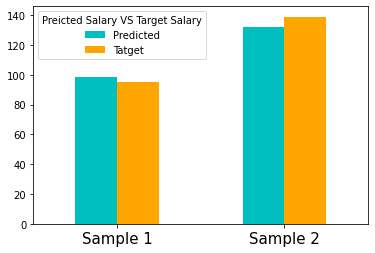

In [75]:
salary_predicted,salary_target =[],[]
salary_predicted.append(model.predict(np.array(xtest.iloc[19,:]).reshape(1,-1))[0])
salary_target.append(ytest[19])
salary_predicted.append(model.predict(np.array(xtest.iloc[72,:]).reshape(1,-1))[0])
salary_target.append(ytest[72])
df_predict_target=pd.DataFrame({'salary_predicted':salary_predicted,'salary_target':salary_target})
plt.figure(figsize=(8,8))
fig,ax =plt.subplots(ncols=1)
df_predict_target.plot(ax=ax,kind='bar',color=['c','orange'])
ax.legend(title='Preicted Salary VS Target Salary',labels=['Predicted','Tatget'])
ax.set_xticklabels(['Sample 1','Sample 2'],fontsize=15)
plt.xticks(rotation=0)
plt.show()

#### We create a dataframe for the salary of predict and the salary of target

In [76]:
data_predicted =pd.DataFrame({'Salary_Predicted':pred_rf_CV,'Salary_Target':ytest})

# conclusion
as you can see above there's so many different approaches that you can take ,there,s so many more models you can build that each of these steps can take a full day or a full week ,but you must to tell a story about why you chose spesific ones for example with the Linear Regression versus the Lasso Regression even though the Lasso performed worse in this use case the Lasso Regression should make more sense because there's a normalization effect and we have kind of sparse matrix .the Random Forest also makes a ton of sense we have a lot of zero one values and that is a good use case we're we're using a bunch of decision trees 